In [73]:
import pandas as pd

In [74]:
lin = pd.read_excel('data_lineups_python_copy.xlsx')

In [75]:
# hits
lin.loc[(lin['Decision'] == lin['correct_answer']) & (lin['target_presence'] == 'tp'), 'hits'] = 1

print(lin)

      Event Index  Participant Private ID Participant External Session ID  \
0               5                 6888761        62f0d46f48f3f004fb921be1   
1               9                 6888761        62f0d46f48f3f004fb921be1   
2              13                 6888761        62f0d46f48f3f004fb921be1   
3              17                 6888761        62f0d46f48f3f004fb921be1   
4              21                 6888761        62f0d46f48f3f004fb921be1   
...           ...                     ...                             ...   
3103          196                 6679659        62b5cc888c781997c6eb05ad   
3104          200                 6679659        62b5cc888c781997c6eb05ad   
3105          204                 6679659        62b5cc888c781997c6eb05ad   
3106          208                 6679659        62b5cc888c781997c6eb05ad   
3107          212                 6679659        62b5cc888c781997c6eb05ad   

     randomiser  Reaction Time Decision  Confidence target_presence  \
0   

In [76]:
# average hits over tp trials for participants
tp_data = lin[lin['target_presence'] == 'tp']
hits_grps = tp_data.groupby(['distinctiveness', 'delay', 'Participant Private ID'])['hits'].mean().reset_index()
print(hits_grps)

    distinctiveness     delay  Participant Private ID      hits
0    Anticaricature     Delay                 6888697  0.428571
1    Anticaricature     Delay                 6888707  0.428571
2    Anticaricature     Delay                 6888713  0.000000
3    Anticaricature     Delay                 6888718  0.428571
4    Anticaricature     Delay                 6888719  0.000000
..              ...       ...                     ...       ...
217       Veridical  No delay                 6679792  0.142857
218       Veridical  No delay                 6679814  0.571429
219       Veridical  No delay                 6680247  0.285714
220       Veridical  No delay                 6680329  1.000000
221       Veridical  No delay                 6680332  0.571429

[222 rows x 4 columns]


In [77]:
mean_hits = hits_grps['hits']
print(mean_hits)

0      0.428571
1      0.428571
2      0.000000
3      0.428571
4      0.000000
         ...   
217    0.142857
218    0.571429
219    0.285714
220    1.000000
221    0.571429
Name: hits, Length: 222, dtype: float64


In [78]:
# false alarms 
lin.loc[(lin['Decision'] != 'Reject') & (lin['correct_answer'] == 'Reject'), 'fas'] = 1
print(lin)

      Event Index  Participant Private ID Participant External Session ID  \
0               5                 6888761        62f0d46f48f3f004fb921be1   
1               9                 6888761        62f0d46f48f3f004fb921be1   
2              13                 6888761        62f0d46f48f3f004fb921be1   
3              17                 6888761        62f0d46f48f3f004fb921be1   
4              21                 6888761        62f0d46f48f3f004fb921be1   
...           ...                     ...                             ...   
3103          196                 6679659        62b5cc888c781997c6eb05ad   
3104          200                 6679659        62b5cc888c781997c6eb05ad   
3105          204                 6679659        62b5cc888c781997c6eb05ad   
3106          208                 6679659        62b5cc888c781997c6eb05ad   
3107          212                 6679659        62b5cc888c781997c6eb05ad   

     randomiser  Reaction Time Decision  Confidence target_presence  \
0   

In [79]:
# average fas over ta trials for participants
ta_data = lin[lin['target_presence'] == 'ta']
fas_grps = ta_data.groupby(['distinctiveness', 'delay', 'Participant Private ID'])['fas'].mean().reset_index()
print(fas_grps)

    distinctiveness     delay  Participant Private ID       fas
0    Anticaricature     Delay                 6888697  0.285714
1    Anticaricature     Delay                 6888707  0.857143
2    Anticaricature     Delay                 6888713  0.285714
3    Anticaricature     Delay                 6888718  0.571429
4    Anticaricature     Delay                 6888719  0.142857
..              ...       ...                     ...       ...
217       Veridical  No delay                 6679792  0.571429
218       Veridical  No delay                 6679814  0.285714
219       Veridical  No delay                 6680247  0.857143
220       Veridical  No delay                 6680329  0.857143
221       Veridical  No delay                 6680332  0.857143

[222 rows x 4 columns]


In [80]:
mean_fas = fas_grps['fas']

In [81]:
mean_fas_div = mean_fas/5
print(mean_fas_div)

0      0.057143
1      0.171429
2      0.057143
3      0.114286
4      0.028571
         ...   
217    0.114286
218    0.057143
219    0.171429
220    0.171429
221    0.171429
Name: fas, Length: 222, dtype: float64


In [82]:
# deal with extreme values for dprime and c - MacMillan & Kaplan, 1985
N = 21

hits_adj = mean_hits.values.copy()
fas_adj = mean_fas_div.values.copy()

hits_adj[mean_hits == 0] = 1 / (2 * N)
hits_adj[mean_hits == 1] = 1 - 1 / (2 * N)

fas_adj[mean_fas_div == 0] = 1 / (2 * N)
fas_adj[mean_fas_div == 1] = 1 - 1 / (2 * N)

In [83]:
print(hits_adj)

[0.42857143 0.42857143 0.02380952 0.42857143 0.02380952 0.28571429
 0.28571429 0.42857143 0.02380952 0.14285714 0.42857143 0.02380952
 0.14285714 0.28571429 0.28571429 0.14285714 0.02380952 0.42857143
 0.28571429 0.28571429 0.42857143 0.28571429 0.28571429 0.02380952
 0.42857143 0.28571429 0.02380952 0.28571429 0.28571429 0.28571429
 0.42857143 0.14285714 0.02380952 0.14285714 0.14285714 0.14285714
 0.28571429 0.14285714 0.42857143 0.14285714 0.42857143 0.28571429
 0.57142857 0.42857143 0.85714286 0.71428571 0.28571429 0.28571429
 0.42857143 0.57142857 0.28571429 0.14285714 0.14285714 0.28571429
 0.57142857 0.28571429 0.85714286 0.97619048 0.57142857 0.57142857
 0.71428571 0.42857143 0.28571429 0.02380952 0.42857143 0.42857143
 0.57142857 0.57142857 0.28571429 0.57142857 0.28571429 0.42857143
 0.42857143 0.28571429 0.14285714 0.42857143 0.14285714 0.14285714
 0.14285714 0.28571429 0.28571429 0.14285714 0.02380952 0.28571429
 0.14285714 0.02380952 0.28571429 0.42857143 0.28571429 0.1428

In [84]:
print(fas_adj)

[0.05714286 0.17142857 0.05714286 0.11428571 0.02857143 0.05714286
 0.05714286 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.05714286 0.11428571 0.14285714 0.2        0.05714286 0.14285714
 0.05714286 0.11428571 0.17142857 0.17142857 0.02380952 0.11428571
 0.02857143 0.11428571 0.11428571 0.14285714 0.17142857 0.11428571
 0.17142857 0.11428571 0.11428571 0.08571429 0.14285714 0.17142857
 0.17142857 0.02857143 0.14285714 0.17142857 0.11428571 0.17142857
 0.05714286 0.08571429 0.05714286 0.08571429 0.14285714 0.14285714
 0.14285714 0.14285714 0.05714286 0.08571429 0.11428571 0.02857143
 0.14285714 0.11428571 0.02857143 0.02857143 0.14285714 0.11428571
 0.02380952 0.08571429 0.08571429 0.08571429 0.02857143 0.17142857
 0.11428571 0.05714286 0.02857143 0.08571429 0.17142857 0.2
 0.08571429 0.14285714 0.02380952 0.08571429 0.11428571 0.11428571
 0.05714286 0.14285714 0.08571429 0.08571429 0.14285714 0.14285714
 0.08571429 0.17142857 0.11428571 0.2        0.14285714 0.14285714
 0

In [85]:
import scipy as sc
from scipy.stats import norm

In [86]:
dprime_ss = norm.ppf(hits_adj) - norm.ppf(fas_adj)
print(dprime_ss)

[ 1.39920715  0.76852267 -0.40153288  1.02403459 -0.0785359   1.0132707
  1.0132707   0.88755815 -0.91318187  0.          0.88755815 -0.91318187
  0.511649    0.63809814  0.5016217  -0.22594929 -0.40153288  0.88755815
  1.0132707   0.63809814  0.76852267  0.38258622  1.41480357 -0.77670544
  1.72220413  0.63809814 -0.77670544  0.5016217   0.38258622  0.63809814
  0.76852267  0.13647644 -0.77670544  0.3000574   0.         -0.11903548
  0.38258622  0.83464597  0.88755815 -0.11903548  1.02403459  0.38258622
  1.75923189  1.18761555  2.64679004  1.93357675  0.5016217   0.5016217
  0.88755815  1.24758289  1.0132707   0.3000574   0.13647644  1.33626767
  1.24758289  0.63809814  2.96978702  3.88296889  1.24758289  1.38405933
  2.54670122  1.18761555  0.8016791  -0.61312447  1.72220413  0.76852267
  1.38405933  1.75923189  1.33626767  1.54764029  0.38258622  0.66160886
  1.18761555  0.5016217   0.91318187  1.18761555  0.13647644  0.13647644
  0.511649    0.5016217   0.8016791   0.3000574  -0.9

In [87]:
c_ss = (norm.ppf(hits_adj) + norm.ppf(fas_adj)) / 0.5
print(c_ss)

[-3.51846378e+00 -2.25709482e+00 -7.11994383e+00 -2.76811866e+00
 -7.76593778e+00 -4.29033668e+00 -4.29033668e+00 -2.49516579e+00
 -6.09664584e+00 -4.27028210e+00 -2.49516579e+00 -6.09664584e+00
 -5.29358009e+00 -3.53999156e+00 -3.26703869e+00 -3.81838351e+00
 -7.11994383e+00 -2.49516579e+00 -4.29033668e+00 -3.53999156e+00
 -2.25709482e+00 -3.02896773e+00 -5.09340244e+00 -6.36959871e+00
 -4.16445773e+00 -3.53999156e+00 -6.36959871e+00 -3.26703869e+00
 -3.02896773e+00 -3.53999156e+00 -2.25709482e+00 -4.54323497e+00
 -6.36959871e+00 -4.87039689e+00 -4.27028210e+00 -4.03221113e+00
 -3.02896773e+00 -5.93957404e+00 -2.49516579e+00 -4.03221113e+00
 -2.76811866e+00 -3.02896773e+00 -2.79841430e+00 -3.09528059e+00
 -1.02329799e+00 -1.60335820e+00 -3.26703869e+00 -3.26703869e+00
 -2.49516579e+00 -1.77511631e+00 -4.29033668e+00 -4.87039689e+00
 -4.54323497e+00 -4.93633064e+00 -1.77511631e+00 -3.53999156e+00
 -1.66929194e+00  1.57071802e-01 -1.77511631e+00 -2.04806918e+00
 -2.82960715e+00 -3.09528

In [88]:
import os

In [89]:
current_dir = os.getcwd()
output_csv_filename = "lin_mean_hits.csv"
output_csv_path = os.path.join(current_dir, output_csv_filename)
hits_grps.to_csv(output_csv_path, index=True)

In [90]:
current_dir = os.getcwd()
output_csv_filename = "lin_mean_fas_div.csv"
output_csv_path = os.path.join(current_dir, output_csv_filename)
mean_fas_div.to_csv(output_csv_path, index=True)

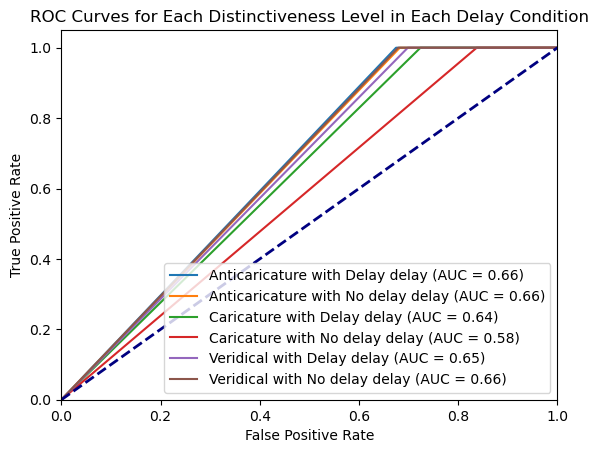

In [116]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import pandas as pd

# Define a function to calculate ROC curve and AUC for each group
def calculate_roc_auc(data):
    # Assuming 'hits' are true positives and 'fas' are false positives
    fpr, tpr, thresholds = roc_curve(data['hits'], 1 - data['fas'])
    roc_auc = auc(fpr, tpr)
    return fpr, tpr, roc_auc

# Group data by distinctiveness and delay levels and calculate ROC and AUC
roc_auc_results = {}
plt.figure()
plt.title('ROC Curves for Each Distinctiveness Level in Each Delay Condition')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
for distinctiveness, distinctiveness_group in lin.groupby('distinctiveness'):
    for delay, delay_group in distinctiveness_group.groupby('delay'):
        key = (distinctiveness, delay)
        fpr, tpr, roc_auc = calculate_roc_auc(delay_group)
        roc_auc_results[key] = {'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
        plt.plot(fpr, tpr, label=f'{distinctiveness} with {delay} delay (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend(loc="lower right")
plt.show()
